In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('C:/Users/maxim/OneDrive/Рабочий стол/ТМО/20222703 Causes Of Death Clean Output V2.0.csv', sep=",")

In [3]:
data.shape

(201762, 6)

In [4]:
data.dtypes

Causes name                 object
Causes Full Description     object
Death Numbers              float64
Entity                      object
Code                        object
Year                         int64
dtype: object

In [5]:
data.isnull().sum()

Causes name                    0
Causes Full Description        0
Death Numbers              11187
Entity                         0
Code                        1485
Year                           0
dtype: int64

In [6]:
data.head()

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 201762


In [8]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((201762, 6), (201762, 4))

In [9]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((201762, 6), (189630, 6))

In [10]:
data_new_1.head()

,Causes name,Causes Full Description,Entity,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,Afghanistan,2007
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,Afghanistan,2007
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",Afghanistan,2007
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,Afghanistan,2007
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,Afghanistan,2007


In [11]:
data_new_2.head()

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007


In [12]:
data_new_3 = data.fillna(0)
data_new_3.head()

,Causes name,Causes Full Description,Death Numbers,Entity,Code,Year
0,Meningitis,Deaths - Meningitis - Sex: Both - Age: All Age...,2933.0,Afghanistan,AFG,2007
1,Neoplasms,Deaths - Neoplasms - Sex: Both - Age: All Ages...,15925.0,Afghanistan,AFG,2007
2,"Fire, heat, and hot substances","Deaths - Fire, heat, and hot substances - Sex:...",481.0,Afghanistan,AFG,2007
3,Malaria,Deaths - Malaria - Sex: Both - Age: All Ages (...,393.0,Afghanistan,AFG,2007
4,Drowning,Deaths - Drowning - Sex: Both - Age: All Ages ...,2127.0,Afghanistan,AFG,2007


In [13]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Death Numbers. Тип данных float64. Количество пустых значений 11187, 5.54%.


In [14]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Death Numbers
0,2933.0
1,15925.0
2,481.0
3,393.0
4,2127.0
...,...
201757,4437.0
201758,136.0
201759,812.0
201760,232.0


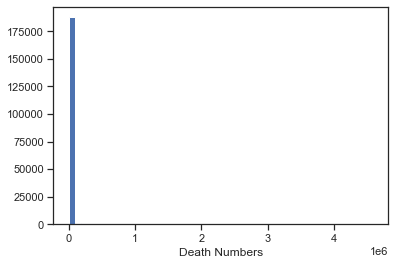

In [15]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [16]:
data_num_Death = data_num[['Death Numbers']]
data_num_Death.head()

,Death Numbers
0,2933.0
1,15925.0
2,481.0
3,393.0
4,2127.0


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [18]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Death)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [19]:
strategies=['mean', 'median', 'most_frequent']

In [20]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Death)
    return data_num_imp[mask_missing_values_only]

In [21]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([8567.73583104, 8567.73583104, 8567.73583104, ..., 8567.73583104,
        8567.73583104, 8567.73583104]))

In [22]:
strategies[1], test_num_impute(strategies[1])

('median', array([213., 213., 213., ..., 213., 213., 213.]))

In [23]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([0., 0., 0., ..., 0., 0., 0.]))

In [24]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [25]:
data[['Death Numbers']].describe()

,Death Numbers
count,1.905750e+05
mean,8.567736e+03
std,7.389484e+04
min,0.000000e+00
25%,1.400000e+01
50%,2.130000e+02
75%,1.919000e+03
max,4.584273e+06


In [26]:
test_num_impute_col(data, 'Death Numbers', strategies[0])

('Death Numbers', 'mean', 11187, 8567.73583103765, 8567.73583103765)

In [27]:
test_num_impute_col(data, 'Death Numbers', strategies[1])

('Death Numbers', 'median', 11187, 213.0, 213.0)

In [28]:
test_num_impute_col(data, 'Death Numbers', strategies[2])

('Death Numbers', 'most_frequent', 11187, 0.0, 0.0)

In [29]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Code. Тип данных object. Количество пустых значений 1485, 0.74%.


In [30]:
cat_temp_data = data[['Code']]
cat_temp_data.head()

,Code
0,AFG
1,AFG
2,AFG
3,AFG
4,AFG


In [31]:
cat_temp_data['Code'].unique()

array(['AFG', 'ALB', 'DZA', nan, 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'HRV', 'CUB',
       'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA',
       'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL',
       'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR',
       'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT',
       'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT',
       'MUS', 'MEX', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR',
       'NA

In [32]:
cat_temp_data[cat_temp_data['Code'].isnull()].shape

(1485, 1)

In [33]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['AFG'],
       ['AFG'],
       ['AFG'],
       ...,
       ['ZWE'],
       ['ZWE'],
       ['ZWE']], dtype=object)

In [34]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CMR',
       'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY',
       'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HND', 'HRV',
       'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV',
       'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP',
       'MOZ', 'MRT',

In [35]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['AFG'],
       ['AFG'],
       ['AFG'],
       ...,
       ['ZWE'],
       ['ZWE'],
       ['ZWE']], dtype=object)

In [36]:
np.unique(data_imp3)

array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CMR',
       'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY',
       'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HND', 'HRV',
       'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV',
       'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP',
       'MOZ', 'MRT',

In [37]:
data_imp3[data_imp3=='NA'].size

1485

In [38]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,AFG
1,AFG
2,AFG
3,AFG
4,AFG
...,...
201757,ZWE
201758,ZWE
201759,ZWE
201760,ZWE


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
cat_enc['c1'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD',
       'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI', 'HRV', 'CUB',
       'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY',
       'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FJI', 'FIN', 'FRA',
       'GUF', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL',
       'GRD', 'GLP', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND',
       'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR',
       'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT',
       'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX',
       'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MTQ', 'MRT',
       'MUS', 'MEX', 'MDA', 'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR',
       'NAM', '

In [41]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [42]:
# Наименования категорий в соответствии с порядковыми номерами
# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака
le.classes_

array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
       'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
       'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
       'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CMR',
       'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY',
       'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HND', 'HRV',
       'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR',
       'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA',
       'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV',
       'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP',
       'MOZ', 'MRT',

In [43]:
cat_enc_le

array([  0,   0,   0, ..., 209, 209, 209])

In [44]:
np.unique(cat_enc_le)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [45]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['AFG', 'AGO', 'ALB', 'AND'], dtype=object)

In [46]:
from sklearn.preprocessing import OrdinalEncoder

In [47]:
data_oe = data[['Code']]
data_oe.head()

,Code
0,AFG
1,AFG
2,AFG
3,AFG
4,AFG


In [48]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['AFG'],
       ['AFG'],
       ['AFG'],
       ...,
       ['ZWE'],
       ['ZWE'],
       ['ZWE']], dtype=object)

In [49]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[  0.],
       [  0.],
       [  0.],
       ...,
       [210.],
       [210.],
       [210.]])

In [50]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [51]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['AFG', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG',
        'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR',
        'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB',
        'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CMR',
        'COD', 'COG', 'COK', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP',
        'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY',
        'ERI', 'ESH', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB',
        'GBR', 'GEO', 'GHA', 'GIN', 'GLP', 'GMB', 'GNB', 'GNQ', 'GRC',
        'GRD', 'GRL', 'GTM', 'GUF', 'GUM', 'GUY', 'HKG', 'HND', 'HRV',
        'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
        'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR',
        'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA',
        'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV',
        'MEX', 'MHL', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MNP',
      

In [52]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['AFG'],
       ['AFG'],
       ['AFG'],
       ...,
       ['ZWE'],
       ['ZWE'],
       ['ZWE']], dtype=object)

In [53]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [54]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [55]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [56]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [59]:
cat_enc.shape

(201762, 1)

In [60]:
cat_enc_ohe.shape

(201762, 210)

In [61]:
cat_enc_ohe

<201762x210 sparse matrix of type '<class 'numpy.float64'>'
	with 201762 stored elements in Compressed Sparse Row format>

In [62]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

In [63]:
cat_enc.head(10)

,c1
0,AFG
1,AFG
2,AFG
3,AFG
4,AFG
5,AFG
6,AFG
7,AFG
8,AFG
9,AFG


In [64]:
pd.get_dummies(cat_enc).head()

,c1_AFG,c1_AGO,c1_ALB,c1_AND,c1_ARE,c1_ARG,c1_ARM,c1_ASM,c1_ATG,c1_AUS,...,c1_VEN,c1_VIR,c1_VNM,c1_VUT,c1_WLF,c1_WSM,c1_YEM,c1_ZAF,c1_ZMB,c1_ZWE
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Code_AFG,Code_AGO,Code_ALB,Code_AND,Code_ARE,Code_ARG,Code_ARM,Code_ASM,Code_ATG,Code_AUS,...,Code_VIR,Code_VNM,Code_VUT,Code_WLF,Code_WSM,Code_YEM,Code_ZAF,Code_ZMB,Code_ZWE,Code_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [67]:
data = pd.read_csv('C:/Users/maxim/OneDrive/Рабочий стол/ТМО/rice_wheat_corn_prices.csv', sep=",")

In [68]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price_wheat_ton']])

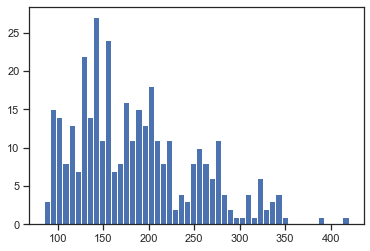

In [69]:
plt.hist(data['Price_wheat_ton'], 50)
plt.show()

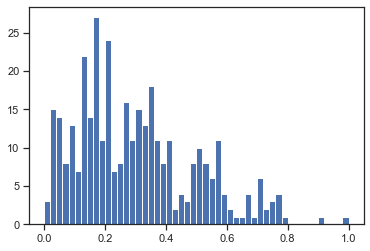

In [70]:
plt.hist(sc1_data, 50)
plt.show()

In [71]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price_wheat_ton']])

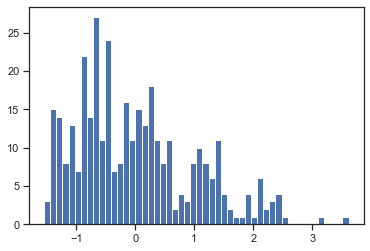

In [72]:
plt.hist(sc2_data, 50)
plt.show()